In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [3]:
df = pd.read_csv("ml_df.csv")
df.dropna(inplace=True)

In [4]:
df.head(10)

,translated_text_no_emoji,emoji_labels
0,After a long time there was a breath of relief,[0]
1,I was able to reduce smoking!,[0]
2,Good morning friends. . . . . . Have a nice day,[]
3,Fun all night online. . .,[0]
4,Road to Sylhet Stadium… Really how beautiful...,[0]
5,A cold wind seems to be blowing. All the beddi...,"[0, 0]"
6,Open GL Error problem solving! http/fb.me/358...,"[0, 3]"
7,The sun does not know how beautiful the moon i...,[1]
8,Today is a happy day after so much injustice a...,[0]
9,ICT (Information and Communication Technology)...,"[0, 0, 0]"


In [8]:
df1=df[df['emoji_labels'].str.len() > 2]

In [9]:
def process_emoji_labels(str):
    if(len(str)>2):
        if(str[2]=="," or str[2]=="]"):
            return int(str[1])
        else:
            return int(str[1:3])

In [10]:
df1['emoji_label_2']=df['emoji_labels'].apply(process_emoji_labels)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9920\462306363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emoji_label_2']=df['emoji_labels'].apply(process_emoji_labels)


In [14]:
df1['emoji_label_2'] = df1['emoji_label_2'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9920\3644619827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emoji_label_2'] = df1['emoji_label_2'].astype(int)


In [15]:
df1.drop('emoji_labels',axis=1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9920\63869934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('emoji_labels',axis=1,inplace=True)


In [16]:
df1.reset_index(drop=True, inplace=True)

In [17]:
df1

,translated_text_no_emoji,emoji_label_2
0,After a long time there was a breath of relief,0
1,I was able to reduce smoking!,0
2,Fun all night online. . .,0
3,Road to Sylhet Stadium… Really how beautiful...,0
4,A cold wind seems to be blowing. All the beddi...,0
...,...,...
767,"Laughing, @sheikhriad1 Vs @dk_sadia",0
768,"Haha, lol hope Atit keeps up the series http/...",0
769,Hahaha..... What do the bulls say... 60 hours ...,0
770,As many incidents of vandalism happen during t...,2


In [19]:
X = df1["translated_text_no_emoji"].values
y = df1["emoji_label_2"].values

In [21]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [22]:
X = X.reshape(-1,)
X.shape

(3104,)

In [41]:
y.shape

(3104,)

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [28]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['After a long time there was a breath of relief '
 'I was able to reduce smoking! ' 'Fun all night online. . .   '
 'Road to Sylhet Stadium…   Really how beautiful our Sylhet!!'
 'A cold wind seems to be blowing. All the bedding is cold. Extreme environment for sleeping. Come to sleep  Good night '
 'Open GL Error problem solving!  http/fb.me/358jcI9zt'
 'The sun does not know how beautiful the moon is, the night does not know how beautiful the day is. Darkness does not know how beautiful the light is. But, I know how beautiful you are!! #SRK_JAN '
 'Today is a happy day after so much injustice and exploitation. Definitely worth enjoying '
 'ICT (Information and Communication Technology) Paira considers herself an engineer Ah what joy inside the mind 3  '
 'Moti has broken again  Today is Eid, joy in the house of Madinah! | Dainik Motikontho http/motikontho.wordpress.com/2013/09/17/kader/\xa0…'] 

Sequences


[[144, 4, 306, 118, 111, 93, 4, 1504, 21, 1505],
 [5, 93, 810, 3, 811, 1506],
 [125, 35, 18, 609],
 [924, 3, 1095, 1507, 247, 81, 88, 113, 1095],
 [4,
  200,
  409,
  277,
  3,
  89,
  1508,
  35,
  2,
  1509,
  10,
  200,
  812,
  925,
  74,
  926,
  145,
  3,
  79,
  12,
  18],
 [533, 728, 1510, 534, 1096, 7, 9, 8, 1511],
 [2,
  102,
  94,
  68,
  76,
  81,
  88,
  2,
  210,
  10,
  2,
  18,
  94,
  68,
  76,
  81,
  88,
  2,
  73,
  10,
  248,
  94,
  68,
  76,
  81,
  88,
  2,
  98,
  10,
  34,
  5,
  76,
  81,
  88,
  6,
  84,
  141,
  142],
 [82, 10, 4, 32, 73, 144, 91, 201, 1512, 15, 1513, 1097, 1514, 927],
 [1515,
  1516,
  15,
  1517,
  1098,
  1518,
  1519,
  1520,
  319,
  1521,
  1099,
  16,
  286,
  1100,
  2,
  381,
  331],
 [1522,
  109,
  928,
  75,
  82,
  10,
  13,
  286,
  33,
  2,
  223,
  21,
  1523,
  1524,
  1101,
  7,
  1101,
  1525,
  104,
  469,
  1526,
  1102,
  929,
  258]]

In [29]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> it
Index:  2 ----> the
Index:  3 ----> to
Index:  4 ----> a
Index:  5 ----> i
Index:  6 ----> you
Index:  7 ----> http
Index:  8 ----> me
Index:  9 ----> fb


In [30]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 2809


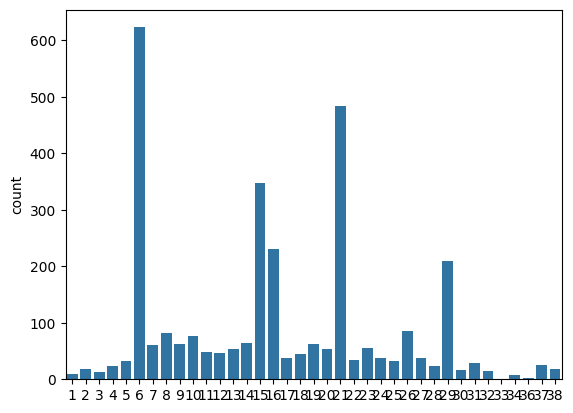

In [31]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [33]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[144, 4, 306, 118, 111, 93, 4, 1504, 21, 1505]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  144    4  306  118  111   93    4 1504   21 1505]]


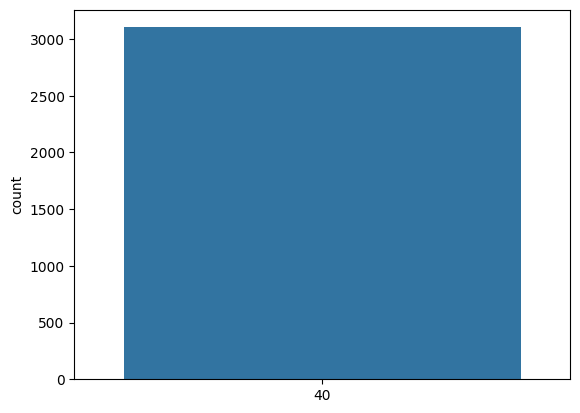

In [34]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [42]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.3, random_state=105)

y_train_encoded = to_categorical(y_train, num_classes=20)
y_test_encoded = to_categorical(y_test, num_classes=20)

print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train_encoded.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test_encoded.shape)

Training X Dim  (2172, 40)
Training y Dim  (2172, 20)
Test X Dim  (932, 40)
Test y Dim  (932, 20)


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, Embedding

vocabulary_size = vocab_size
seq_len = 40
embed_len = 10

model = Sequential()
model.add(Embedding(vocabulary_size + 1, embed_len, input_shape=(seq_len,)))
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(units=40, activation='softmax'))
model.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 40, 10)              │          28,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 40, 80)              │          29,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 40, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 40, 40)              │          19,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 40, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 40, 20)              │             820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,400 (302.34 KB)

 Trainable params: 77,400 (302.34 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [99]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train_encoded, num_classes=20)
y_test_cat = to_categorical(y_test_encoded, num_classes=20)

In [100]:
y_test_cat

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [101]:
y_train_reshaped = np.tile(y_train_cat[:, np.newaxis, :], (1, seq_len, 1))
y_test_reshaped = np.tile(y_test_cat[:, np.newaxis, :], (1, seq_len, 1))

print("Training target shape:", y_train_reshaped.shape)
print("Test target shape:", y_test_reshaped.shape)

Training target shape: (2172, 1, 800, 20)
Test target shape: (932, 1, 800, 20)


In [102]:
batch_size=128
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 20, 20), output.shape=(None, 40, 20)